# Nonlinear Regression 

### For simplicity - Define a class supporting both Polynomial and RBF mapping 

In [22]:
import pandas as pd
import numpy as np
from collections import deque
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

np.random.seed(2500)
class NonlinearRegression(object):
    # regressor = NonlinearRegression('grbf')
    def __init__(self, kernel_type='poly'):
        self.kernel_type = kernel_type
        self._flag = 0
        self.weights = None
        self._polydegree = 0
        self._nbasisfuncs = 0
        if kernel_type == 'grbf':
            self._flagrbf = 0

    def _fit(self, phi, out):
        self._flag = 1
        self.weights = np.dot(np.linalg.inv(np.dot(phi.T, phi)), np.dot(phi.T, out))

    def _polynomialmodel(self, X, Q):
        self._polydegree = Q
        row, columns = X.shape
        phi = deque()
        phi.append(np.ones(row))
        for degree in range(1, self._polydegree+1):
            for col in range(columns):
                phi.append(X[:,col]**degree)
        return np.array(phi).T

    def _gaussianmodel(self, X, Q, s = 2):
        self._nbasisfuncs = Q
        row, columns = X.shape
        phi = deque()
        phi.append(np.ones(row))
        if self._flagrbf == 0:
            row, column = X.shape
            index = np.random.choice(row, size=self._nbasisfuncs, replace=False)
            self.mu = X[index, :]
        else:
            self.mu = self.mu
        for number in range(len(self.mu)):
            phi.append([np.exp(-np.linalg.norm(i-self.mu[number])**2/(2*s**2)) for i in X])
        return np.array(phi).T

    def fit(self, X, y, Q):
        if self.kernel_type == 'poly':
            phi = self._polynomialmodel(X, Q)
            self._fit(phi, y)
        elif self.kernel_type == 'grbf':
            phi = self._gaussianmodel(X, Q)
            self._flagrbf = 1
            self._fit(phi, y)
        else:
            raise ValueError('The entered basis function is not supported in the present form!')

    def predict(self, Xte):
        if self._flag == 1:
            if self.kernel_type == 'poly':
                return self._polynomialmodel(Xte, self._polydegree).dot(self.weights)
            elif self.kernel_type == 'grbf':
                return self._gaussianmodel(Xte, self._nbasisfuncs).dot(self.weights)
            else:
                raise('The enterd kernels is not supporsted by the presented form!')
        else:
            raise ('You need to fit the model at first!')

#### Data generating

In [23]:
N = 1000
np.random.seed(200)
X1 = np.random.randn(N, 1)
X2 = 2 + np.random.randn(N, 1)
X3 = 4 + np.random.randn(N, 1)
X4 = 2 + 2*np.random.randn(N, 1)
X5 = 4 + 2*np.random.randn(N, 1)
X = np.hstack((X1, X2, X3, X4, X5))
X = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4', 'X5'])
y = 0.5 + X1 + 2*X2 - 10*X3 + 3*X4 + X1**2 -2*X2**5 + X3**4 + 0.005*np.random.randn(N, 1)

#### Creating an object for polynomial curve fitting 

31


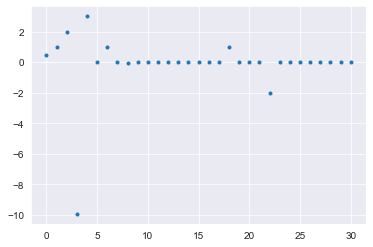

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = NonlinearRegression(kernel_type='poly')
model.fit(X_train.values, y_train, Q = 6)
W = model.weights
print(len(W))
plt.plot(W, '.')
plt.show()

In [263]:
W

array([[ 4.72672790e-01],
       [ 9.99698343e-01],
       [ 2.00105397e+00],
       [-9.93594307e+00],
       [ 3.00016866e+00],
       [ 2.52547616e-04],
       [ 9.99899078e-01],
       [ 1.98804913e-03],
       [-5.82127571e-02],
       [-1.35635182e-04],
       [-8.88428593e-04],
       [-1.96672154e-04],
       [-2.90529383e-03],
       [ 2.55305171e-02],
       [ 4.94015731e-05],
       [ 5.52718557e-04],
       [ 6.65500374e-05],
       [ 1.32323150e-03],
       [ 9.94207185e-01],
       [ 8.52774133e-06],
       [-1.30359380e-04],
       [ 3.21775533e-05],
       [-2.00024458e+00],
       [ 6.52967487e-04],
       [-6.24133145e-06],
       [ 1.32447667e-05],
       [-4.81689494e-06],
       [ 1.56295464e-05],
       [-2.88751762e-05],
       [ 6.40635008e-07],
       [-4.86123032e-07]])

#### Evaluate the Model

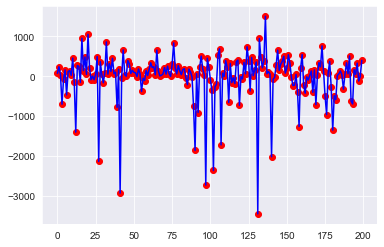

In [25]:
y_pre = model.predict(X_test.values)
# Error = y_pre - y_test
# print(np.std(Error))
plt.plot(y_pre, 'ro')
plt.plot(y_test, 'b')
plt.show()

#### How to adjust the hyper parameter?


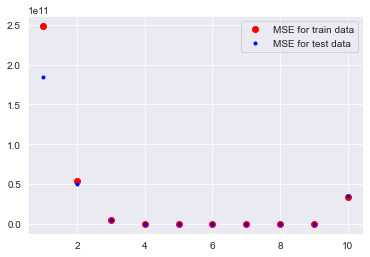

In [26]:
Q = np.arange(1, 11, 1)
mse_tr = []
mse_te = []
for q in Q:
    # print(q)
    model.fit(X_train.values, y_train, Q=q)
    y_pre_tr = model.predict(X_train.values)
    y_pre_te = model.predict(X_test.values)
    mse_tr.append(((y_pre_tr - y_train)**2).sum()/0.8*N)
    mse_te.append(((y_pre_te - y_test)**2).sum()/0.2*N)


plt.plot(Q, mse_tr, 'ro')
plt.plot(Q, mse_te, 'b.')
plt.legend(['MSE for train data', 'MSE for test data'])
plt.show()

#### Creating an object for RBF curve fitting 

In [13]:
model = NonlinearRegression(kernel_type='grbf')
model.fit(X_train.values, y_train, Q = 700)

#### Evaluate the Model  

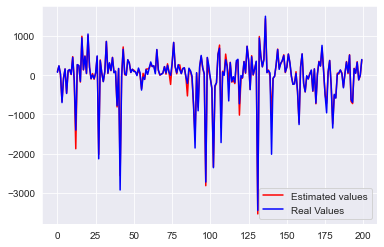

In [14]:
y_pre = model.predict(X_test.values)
plt.plot(y_pre, 'r')
plt.plot(y_test, 'b')
plt.legend(['Estimated values', 'Real Values'])
plt.show()